In [2]:
import pandas as pd
import numpy as np
import matplotlib as mt
import re
import seaborn as sns


In [3]:
file_path = 'D:/Codex Cue Inter/1 project eda/All the Intermediate Colleges in Pakistan.xlsx'
file_path_1 = 'D:/Codex Cue Inter/1 project eda/City.xlsx'


In [4]:
addresses_df = pd.read_excel(file_path , sheet_name='All the Intermediate Colleges i')  # Adjust sheet_name if needed
city_df = pd.read_excel(file_path_1 , sheet_name='Sheet1')

pd.set_option('display.max_rows', None)


In [5]:
Address_column=addresses_df.iloc[:, 1]

In [6]:
city_column=city_df.iloc[:, 0]

In [7]:
Address_column['City'] = None

In [8]:
Address_column

0       Office 206, 2nd Floor Siddique Trade Center Ma...
1                             Sector H-8, Islamabad-44000
2               GC University, Katchery Road Lahore 54000
3                            Kotwali Rd, Faisalabad 38000
4                     Near Wapda Flats, Jail Road, Lahore
5       University of Agriculture, Agriculture Univers...
6       PMAS-Arid Agriculture University Rawalpindi, S...
7       International Islamic University Sector H-10, ...
8                                   93- Jail Road, Lahore
9                   Kutchery Campus, L.M.Q. Road, Multan.
10                           Ferozepur Road Lahore 54600 
11      Head Office :28-M Quaid-e-Azam Industrial Esta...
12      1 Noon Avenue, New Muslim Town at Canal Bank L...
13                     2-Durrand Road Garhi Shahu, Lahore
14      31 Tipu Block new Garden town Lahore kalma cho...
15                       Baragali Summer Campus, Peshawar
16      Regional Campus, Allama Iqbal Open University,...
17      Islami

In [9]:
print(Address_column)

0       Office 206, 2nd Floor Siddique Trade Center Ma...
1                             Sector H-8, Islamabad-44000
2               GC University, Katchery Road Lahore 54000
3                            Kotwali Rd, Faisalabad 38000
4                     Near Wapda Flats, Jail Road, Lahore
5       University of Agriculture, Agriculture Univers...
6       PMAS-Arid Agriculture University Rawalpindi, S...
7       International Islamic University Sector H-10, ...
8                                   93- Jail Road, Lahore
9                   Kutchery Campus, L.M.Q. Road, Multan.
10                           Ferozepur Road Lahore 54600 
11      Head Office :28-M Quaid-e-Azam Industrial Esta...
12      1 Noon Avenue, New Muslim Town at Canal Bank L...
13                     2-Durrand Road Garhi Shahu, Lahore
14      31 Tipu Block new Garden town Lahore kalma cho...
15                       Baragali Summer Campus, Peshawar
16      Regional Campus, Allama Iqbal Open University,...
17      Islami

In [10]:
y=Address_column.to_frame(name='Address')
cities=city_column.to_frame(name='City')

In [11]:
type(cities)

pandas.core.frame.DataFrame

In [12]:
z=y.to_excel('Address_column.xlsx', index=False)
x=cities.to_excel ('City.xlsx', index=False)

In [13]:
import os
print(os.getcwd())

C:\Users\Muneeb


In [14]:
type(z)

NoneType

In [15]:
addresses_df = pd.read_excel('Address_column.xlsx')

In [16]:
city_df = pd.read_excel('City(1).xlsx')

In [17]:
city_df['City'] = city_df['City'].astype(str).fillna('').str.lower()
city_names = city_df['City'].tolist() 

addresses_df['Address'] = addresses_df['Address'].astype(str).fillna('').str.lower()

In [18]:
print (addresses_df)

                                                Address
0     office 206, 2nd floor siddique trade center ma...
1                           sector h-8, islamabad-44000
2             gc university, katchery road lahore 54000
3                          kotwali rd, faisalabad 38000
4                   near wapda flats, jail road, lahore
5     university of agriculture, agriculture univers...
6     pmas-arid agriculture university rawalpindi, s...
7     international islamic university sector h-10, ...
8                                 93- jail road, lahore
9                 kutchery campus, l.m.q. road, multan.
10                         ferozepur road lahore 54600 
11    head office :28-m quaid-e-azam industrial esta...
12    1 noon avenue, new muslim town at canal bank l...
13                   2-durrand road garhi shahu, lahore
14    31 tipu block new garden town lahore kalma cho...
15                     baragali summer campus, peshawar
16    regional campus, allama iqbal open univers

In [19]:
def extract_city(address, city_names):
    if not isinstance(address, str):  # Check if address is not a string
        address = str(address)  # Convert address to string
    for city in city_names:
        if city in address:
            return city
    return None


In [20]:
print(addresses_df['Address'].apply(type).unique())  # Check unique types in the 'Address' column
print(city_df['City'].apply(type).unique()) 

[<class 'str'>]
[<class 'str'>]


In [21]:
addresses_df['City'] = addresses_df['Address'].apply(lambda x: extract_city(x, city_names))

In [22]:
addresses_df.to_excel('modified_addresses.xlsx', index=False)

In [23]:
province_df = pd.read_excel('City(1).xlsx')

In [24]:



province_df['Province'] = province_df['Province'].astype(str).fillna('').str.lower()
province_df['City'] = province_df['City'].astype(str).fillna('').str.lower()


In [25]:
modified_addresses_df= pd.read_excel ('modified_addresses.xlsx')


In [26]:
merged_df = pd.merge(modified_addresses_df, province_df, on='City', how='left')


In [27]:
merged_df.to_excel('updated_first_sheet.xlsx', index=False)

In [28]:
df = pd.read_excel("All the Intermediate Colleges in Pakistan (1).xlsx" , sheet_name='All the Intermediate Colleges i')

In [29]:
df_1 = pd.read_excel("All the Intermediate Colleges in Pakistan (3).xlsx" , sheet_name='All the Intermediate Colleges i')

In [30]:
import matplotlib.pyplot as plt

In [31]:
df_4 = pd.read_excel("All the Intermediate Colleges in Pakistan (4).xlsx")

df_4['Province'] = df_4['Province'].astype(str).fillna('').str.lower()

In [32]:
average_rating_by_province = df_4.groupby('Province')['Rating'].mean().reset_index()
average_rating_by_province = average_rating_by_province.sort_values(by='Rating', ascending=True)

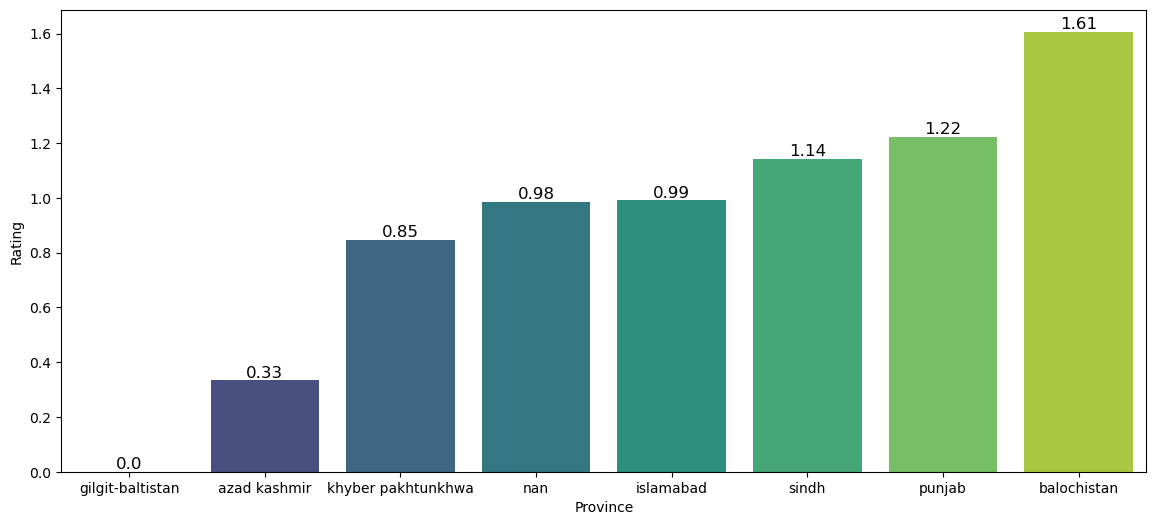

In [33]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='Province', y='Rating', data=average_rating_by_province, palette='viridis')
for i, row in enumerate(average_rating_by_province.itertuples()):
    ax.text(i, row.Rating, round(row.Rating, 2), color='black', ha="center", va="bottom", fontsize=12)

# Adding titles and labels

In [34]:
df_4['City'] = df_4['City'].astype(str).fillna('').str.lower()

In [35]:
average_rating_by_city = df_4.groupby('City')['Rating'].mean().reset_index()
average_rating_by_city = average_rating_by_city.sort_values(by='Rating', ascending=True)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


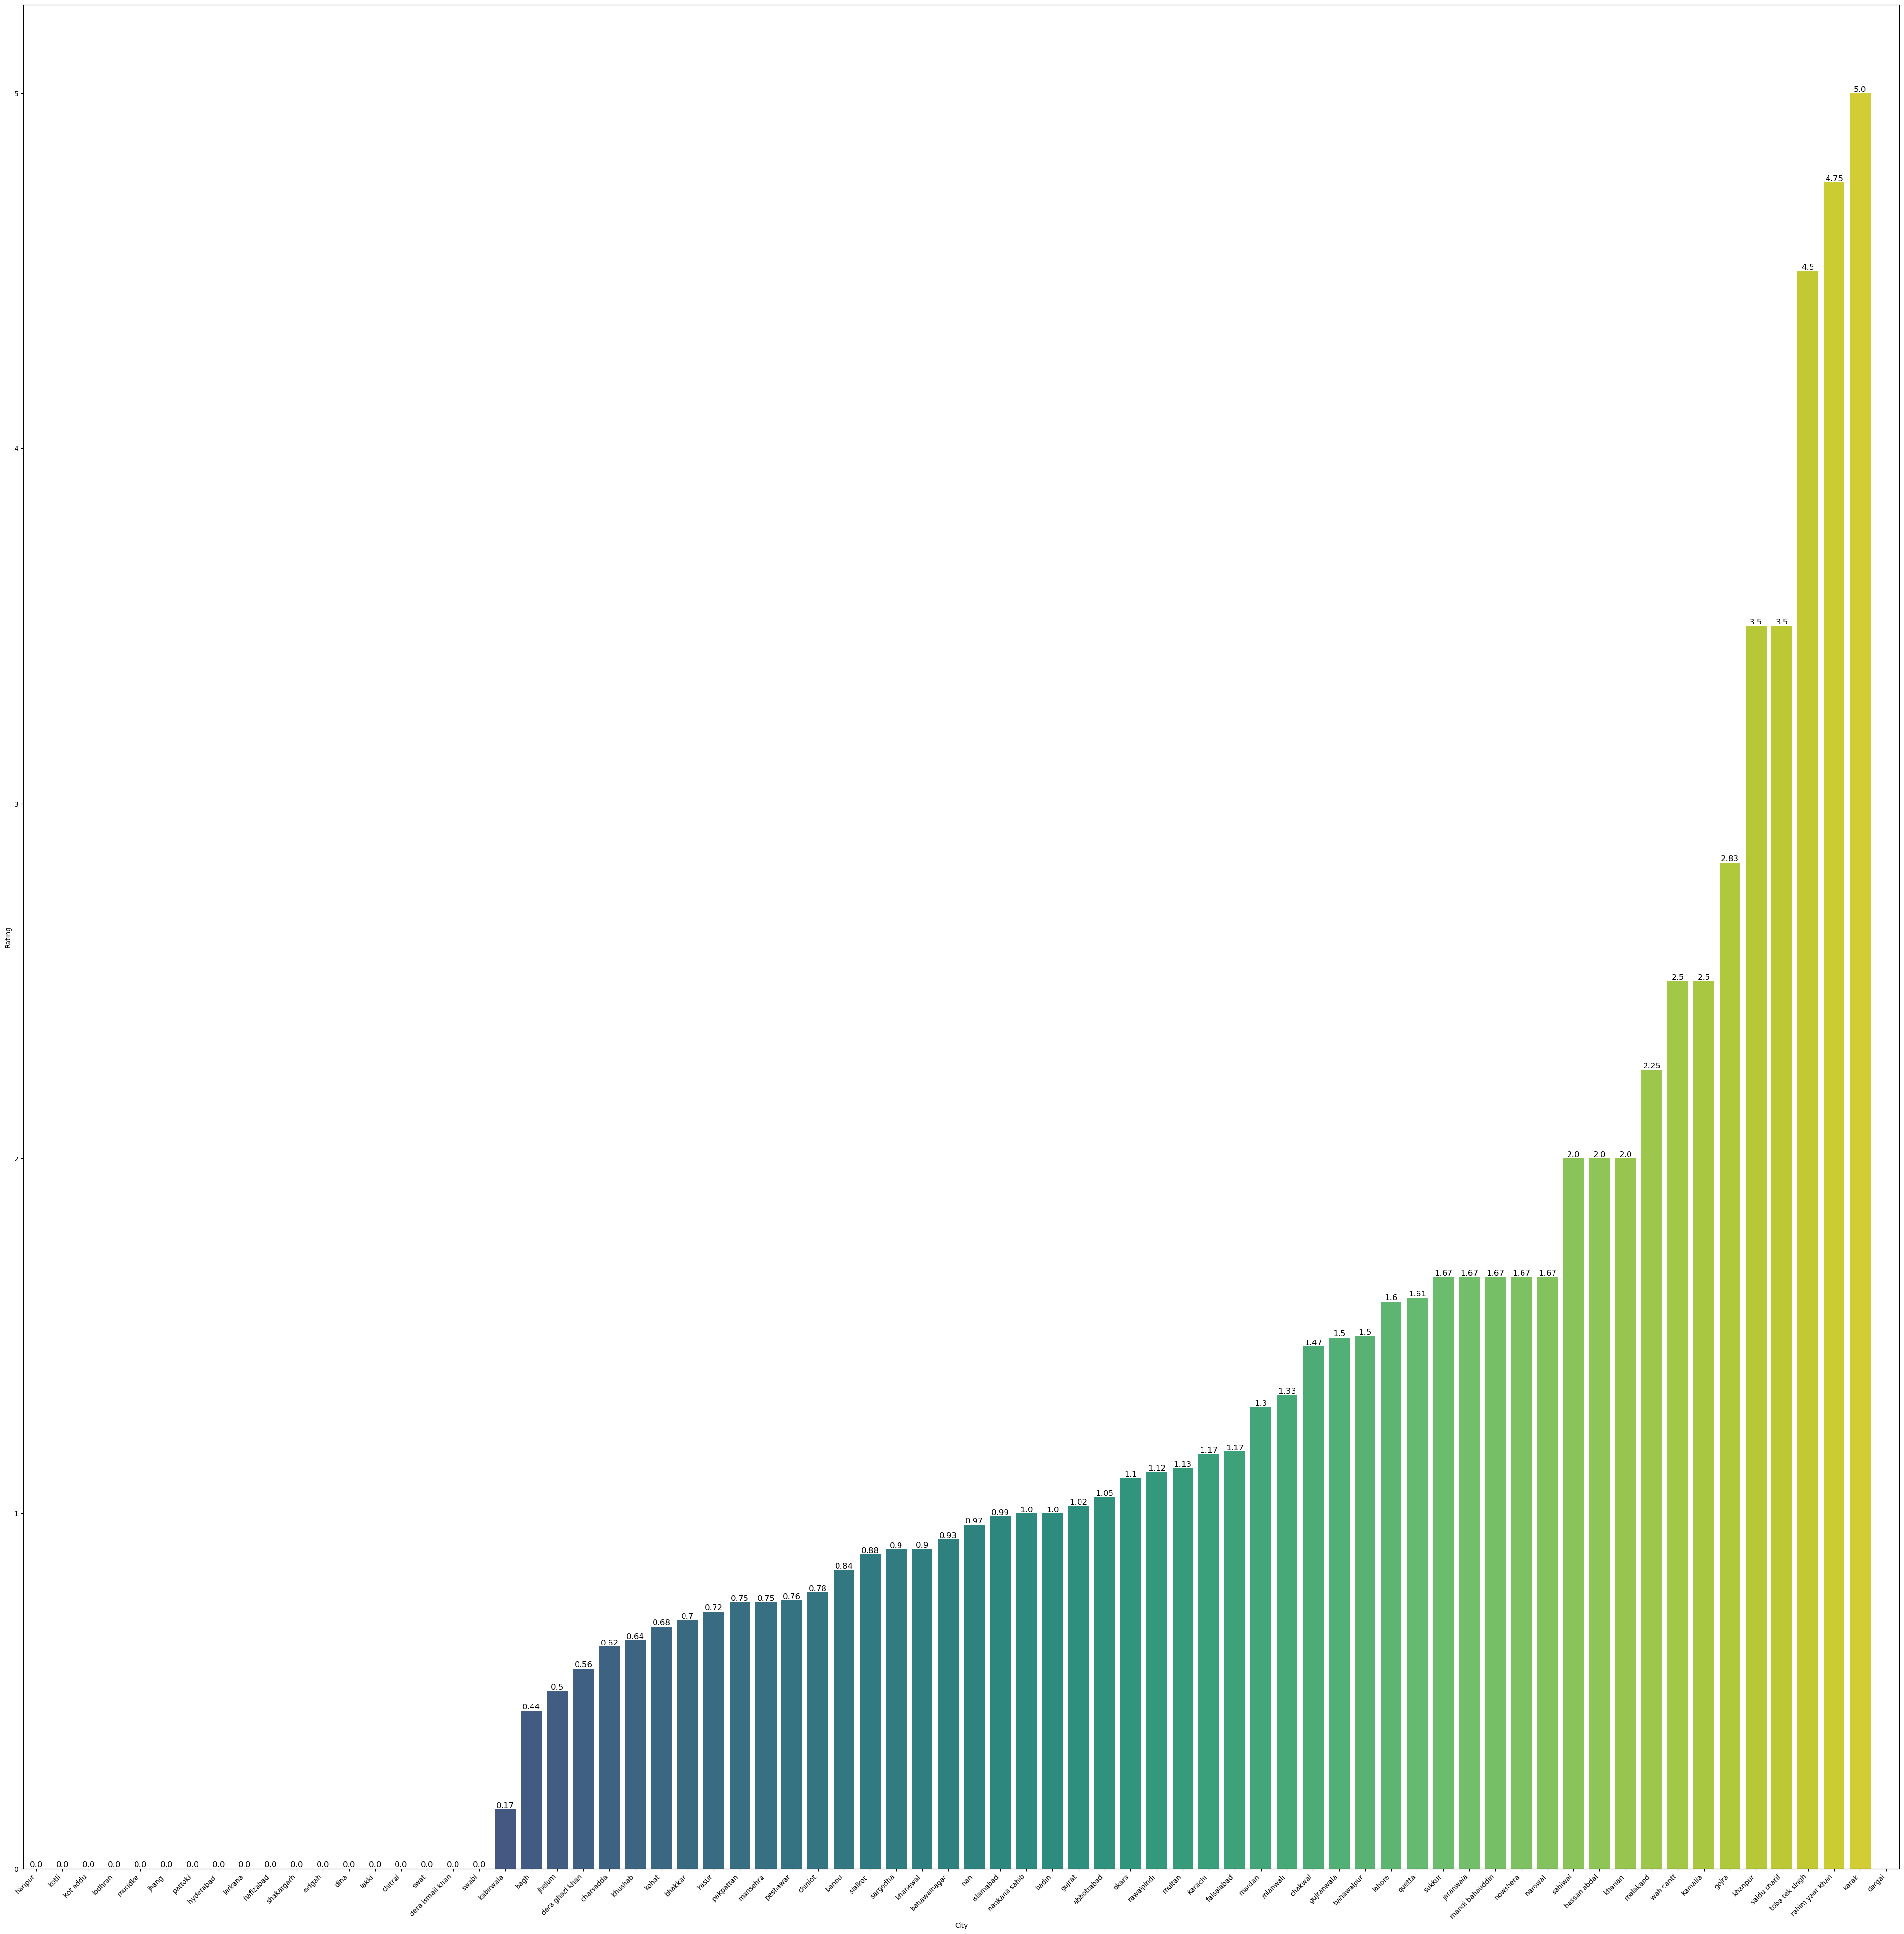

In [36]:
plt.figure(figsize=(50, 50))
ax = sns.barplot(x='City', y='Rating', data=average_rating_by_city, palette='viridis')
for i, row in enumerate(average_rating_by_city.itertuples()):
    ax.text(i, row.Rating, round(row.Rating, 2), color='black', ha="center", va="bottom", fontsize=12)
    plt.xticks(rotation=45, ha='right')

# Adding titles and labels

In [53]:
df_4['Sector'] = df_4['Sector'].astype(str).fillna('').str.lower()

In [54]:
average_rating_by_sector = df_4.groupby('Sector')['Rating'].mean().reset_index()

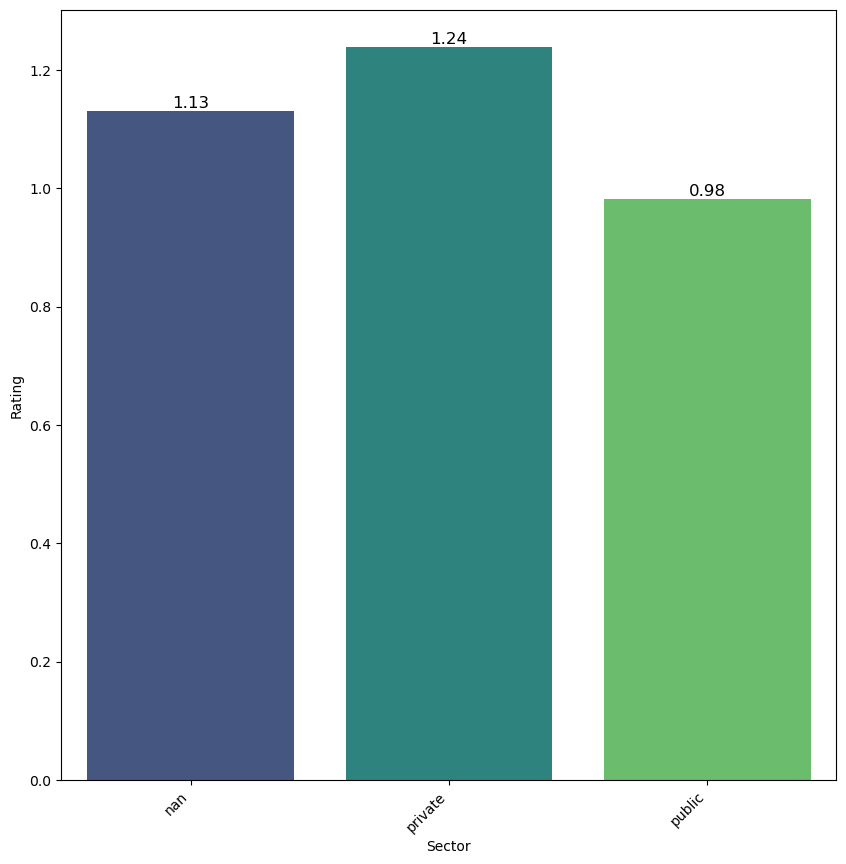

In [56]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Sector', y='Rating', data=average_rating_by_sector, palette='viridis')
for i, row in enumerate(average_rating_by_sector.itertuples()):
    ax.text(i, row.Rating, round(row.Rating, 2), color='black', ha="center", va="bottom", fontsize=12)
    plt.xticks(rotation=45, ha='right')

# Adding titles and labels
plt.show()


In [ ]:
df_4['Affiliation'] = df_4['Affiliation'].astype(str).fillna('').str.lower()

In [ ]:
average_rating_by_affiliation = df_4.groupby('Affiliation')['Rating'].mean().reset_index()


In [ ]:
average_rating_by_affiliation = average_rating_by_affiliation.sort_values(by='Rating', ascending=True)

### plt.figure(figsize=(50, 50))
ax = sns.barplot(x='Affiliation', y='Rating', data=average_rating_by_affiliation, palette='viridis')
for i, row in enumerate(average_rating_by_affiliation.itertuples()):
    ax.text(i, row.Rating, round(row.Rating, 2), color='black', ha="center", va="bottom", fontsize=12)
    plt.xticks(rotation=45, ha='right')

# Adding titles and labels
plt.show()


In [58]:
plt.show()


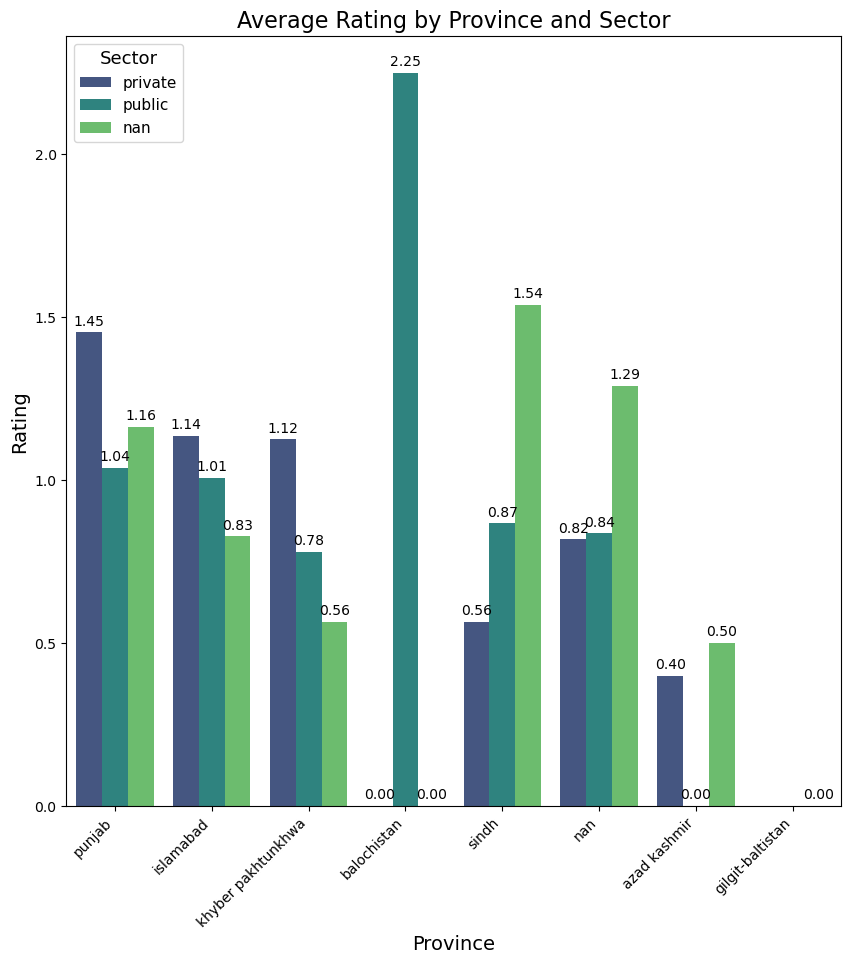

In [59]:
plt.figure(figsize=(10,10))  # Increase figure size for better spacing

# Create the clustered bar chart
ax = sns.barplot(x='Province', y='Rating', hue='Sector', data=df_4, palette='viridis',errorbar=None)

# Adding value labels on top of each bar

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points')

# Adding titles and labels
plt.title('Average Rating by Province and Sector', fontsize=16)
plt.xlabel('Province', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.legend(title='Sector', title_fontsize='13', fontsize='11')  # Add legend with title
plt.xticks(rotation=45, ha='right')
# Display the plot
plt.show()

In [60]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

In [61]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Assume df_4 already contains 'City', 'Latitude', 'Longitude', and 'Rating' columns

# Apply the function to your data
df_4['Latitude'], df_4['Longitude'] = zip(*df_4.apply(lambda row: get_lat_long(row['City'], row['Province']), axis=1))

df_4 = df_4.dropna(subset=['Latitude', 'Longitude'])


# Group the data by city and calculate the average rating for each city
city_grouped = df_4.groupby('City').agg({
    'Latitude': 'mean',    # Average latitude of the city
    'Longitude': 'mean',   # Average longitude of the city
    'Rating': 'mean'       # Average rating of the city
}).reset_index()



# Initialize a map centered around the average location
map_center = [city_grouped['Latitude'].mean(), city_grouped['Longitude'].mean()]
map_ = folium.Map(location=map_center, zoom_start=6)

# Add marker clusters
marker_cluster = MarkerCluster().add_to(map_)

# Plot each city on the map with a marker
for _, row in city_grouped.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['City']} - Average Rating: {row['Rating']:.2f}",
        icon=folium.Icon(color="green" if row['Rating'] > 4 else "red")
    ).add_to(marker_cluster)

# Save the map to an HTML file
map_.save("city_average_ratings_map.html")

# Display the map (in a Jupyter Notebook or similar)
map_

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=bhakkar%2C+punjab%2C+Pakistan&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [ ]:
import geopandas as gpd